# Demonstration of a Rydberg gate

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
import qutip
import krotov

$\newcommand{\ket}[1]{\vert #1 \rangle}$

This example follows Goerz et al. Phs. Rev A 90, 032229 (2014)

## Rydberg atomic states

The Hilbert space for a single atom consists of $\ket{0}$, $\ket{1}$, $\ket{i}$, $\ket{r}$

In [8]:
def ket(label):
    """Eigenstate of one or more Rydberg atoms."""
    levels = ['0', '1', 'i', 'r']
    states = []
    N = len(levels)
    for label in str(label):
        states.append(qutip.basis(N, levels.index(label)))
    return qutip.tensor(*states)

In [82]:
ket('000')

Quantum object: dims = [[4, 4, 4], [1, 1, 1]], shape = (64, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

## Hamiltonian

In [15]:
# ħ = 1
GHz = 2 * np.pi
ns = 1
MHz = 1e-3 * GHz

In [16]:
def _H0_1q(E1, Δ1, Δ2):
    return qutip.Qobj(np.diag([0, E1, Δ1, Δ2]))

In [17]:
H0_1q = _H0_1q(E1=(9.1 * GHz), Δ1=(1.273 * GHz), Δ2=0)

In [18]:
Id = qutip.identity(4)

In [19]:
def _H_int(u):
    return u * ket('rr') * ket('rr').dag()

In [20]:
H_int = _H_int(57.26 * MHz)

In [21]:
H_int

Quantum object: dims = [[4, 4], [4, 4]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.   

In [22]:
H0 = qutip.tensor(H0_1q, Id) + qutip.tensor(Id, H0_1q) + H_int

In [83]:
H0_3atoms = qutip.tensor(H0_1q, Id, Id) + qutip.tensor(Id, H0_1q, Id) + qutip.tensor(H0_1q, Id, Id)

In [84]:
H0_3atoms

Quantum object: dims = [[4, 4, 4], [4, 4, 4]], shape = (64, 64), type = oper, isherm = True
Qobj data =
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

In [23]:
H0

Quantum object: dims = [[4, 4], [4, 4]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [  0.          57.1769863    0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.           7.9984949    0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.           0.           0.          57.1769863
    0.           0.           0.           0.           0.
    0

In [24]:
H_1B = ket('0') * ket('i').dag() + ket('i') * ket('0').dag()
H_1R = ket('i') * ket('r').dag() + ket('r') * ket('i').dag()

In [25]:
H_B_left = qutip.tensor(H_1B, Id)
H_B_right = qutip.tensor(Id, H_1B) 
H_R_left = qutip.tensor(H_1R, Id)
H_R_right = qutip.tensor(Id, H_1R)

/Users/goerz/Desktop/jupyter_tutorial_rydberg/.venv/lib/python3.8/site-packages/qutip/visualization.py:323: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)
/Users/goerz/Desktop/jupyter_tutorial_rydberg/.venv/lib/python3.8/site-packages/qutip/visualization.py:331: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(list(reversed(ylabels)))


(<Figure size 576x432 with 2 Axes>, <AxesSubplot:>)

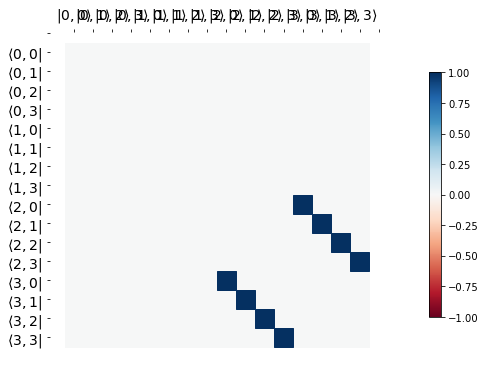

In [26]:
qutip.hinton(H_R_left)

In [27]:
T = 800 * ns

In [28]:
tlist = np.linspace(0, T, 1000)

In [30]:
def Ω_B_left(t, args):
    E0 = 140 * MHz
    return (
        E0 * krotov.shapes.blackman(t, 0, 50) +
        E0 * krotov.shapes.blackman(t, T-50, T)
    )

In [34]:
def Ω_B_right(t, args):
    E0 = 55 * MHz
    return E0 * krotov.shapes.blackman(t, 0, T)

In [35]:
Ω_R_left = Ω_B_left
Ω_R_right = Ω_B_right

In [31]:
def plot_pulse(func, tlist, args=None, unit='MHz'):
    """Generate plot of a time-dependent driving field."""
    fig, ax = plt.subplots()
    vals = np.array([func(t, args) for t in tlist])
    if unit == 'MHz':
        vals /= MHz
    elif unit == 'GHz':
        vals /= GHz
    else:
        raise ValueError("Invalid unit")
    ax.plot(tlist, vals, label=func.__name__)
    ax.set_xlabel('time (ns)')
    ax.set_ylabel('amplitude (%s)' % unit)
    ax.legend()
    return fig, ax

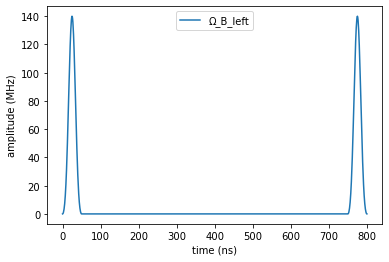

In [32]:
plot_pulse(Ω_B_left, tlist);

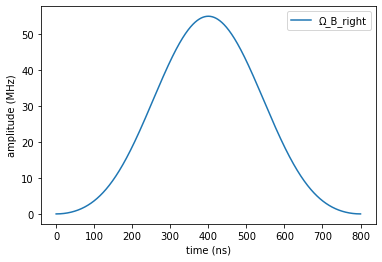

In [36]:
plot_pulse(Ω_B_right, tlist);

$\hat{H} = \hat{H}_0 + \sum_i S_i(t) \hat{H}_i$

In [37]:
H = [H0, [H_B_left, Ω_B_left], [H_B_right, Ω_B_right], [H_R_left, Ω_R_left], [H_R_right, Ω_R_left]]

## Propagation

In [39]:
res = qutip.mesolve(H, ket('00'), tlist)

In [43]:
def amplitude(state, level):
    return complex((ket(level).dag() * state).full())

In [44]:
def phase(state, level):
    a = amplitude(state, level)
    return np.angle(a)

In [45]:
def pop(state, level):
    a = amplitude(state, level)
    return abs(a)**2

In [46]:
def pops(res, level):
    return np.array([pop(state, level) for state in res.states])

In [47]:
def phases(res, level):
    return np.array([phase(state, level) for state in res.states])

In [57]:
def plot_pops(res, labels):
    fig, ax = plt.subplots()
    for label in labels:
        ax.plot(res.times, pops(res, label), label=label)
    ax.legend()
    ax.set_xlabel('time (ns)')
    ax.set_ylabel('population')
    return fig, ax

In [58]:
%matplotlib widget

In [59]:
plot_pops(res, ['00', 'i0', 'r0']);

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [60]:
def plot_phases(res, labels):
    fig, ax = plt.subplots()
    for label in labels:
        ϕ = phases(res, label) / np.pi
        ax.plot(res.times, ϕ, label=label)
    ax.legend()
    ax.set_xlabel('time (ns)')
    ax.set_ylabel('phase (π)')
    return fig, ax

In [61]:
plot_phases(res, ['00', 'r0']);

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Gate

In [62]:
def propagate(label, H, tlist):
    """Propagate the state (by label) and return the resulting state at T."""
    psi0 = ket(label)
    return qutip.mesolve(H, psi0, tlist).states[-1]

In [63]:
krotov.parallelization.set_parallelization(use_loky=True)

In [64]:
prop_states = krotov.parallelization.parallel_map(
    propagate, ['00', '01', '10', '11'], task_kwargs=dict(H=H, tlist=tlist),
    progress_bar=True
)

25.0%. Run time:  97.68s. Est. time left: 00:00:04:53
50.0%. Run time: 324.57s. Est. time left: 00:00:05:24
75.0%. Run time: 325.96s. Est. time left: 00:00:01:48
100.0%. Run time: 536.01s. Est. time left: 00:00:00:00
Total run time: 536.25s


In [75]:
import pickle

In [77]:
with open("prop.dump", "wb") as out_fh:
    pickle.dump(prop_states, out_fh)

In [78]:
with open('prop.dump', 'rb') as in_fh:
    xxx = pickle.load(in_fh)

In [65]:
basis_states = [ket(label) for label in ('00', '01', '10', '11')]

In [66]:
U = krotov.functionals.gate(basis_states, prop_states)

In [67]:
U

Quantum object: dims = [[4, 4], [4, 4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[-0.940723  -0.23842028j  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.9144536 -0.32496193j  0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j         -0.95024962-0.31148733j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
   0.98417112-0.17722078j]]

In [68]:
def pop_loss(U):
    """Loss of population from the logical subspace."""
    return 1 - (U.dag() * U).tr() / 4.0

In [69]:
pop_loss(U)

0.02909291595114849

In [70]:
def closest_unitary(U):
    V, Σ, Wdag = np.linalg.svd(U.full())
    return qutip.Qobj(V @ Wdag)

In [71]:
Uu = closest_unitary(U)

In [72]:
Uu

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[-0.96935197-0.24567612j  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.94227229-0.33484763j  0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j         -0.95025024-0.31148753j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
   0.98417112-0.17722078j]]

In [80]:
def diag_concurrence(U):
    """Calculate the concurrence for a diagonal unitary U."""
    ϕ00, ϕ01, ϕ10, ϕ11 = np.angle(np.diag(U.full()))
    γ = ϕ00 - ϕ01 - ϕ10 + ϕ11
    return np.abs(np.sin(γ/2))

In [81]:
diag_concurrence(Uu)

0.04735267861448225

In [ ]:
krotov.functionals.F_avg(